# Práctico 3 - Procesamiento Digital de Imágenes

In [65]:
import math
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#Definiendo Matriz de RGB a YIQ
MatrizRGBtoYIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])
#Definiendo Matriz de YIQ a RGB  
MatrizYIQtoRGB=np.array([[1,0.9663,0.6210],
                         [1,-0.2721,-0.6474],
                         [1,-1.1070,1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MatrizRGBtoYIQ)

def yiq2rgb(img):
    return apply_matrix(img, MatrizYIQtoRGB)

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

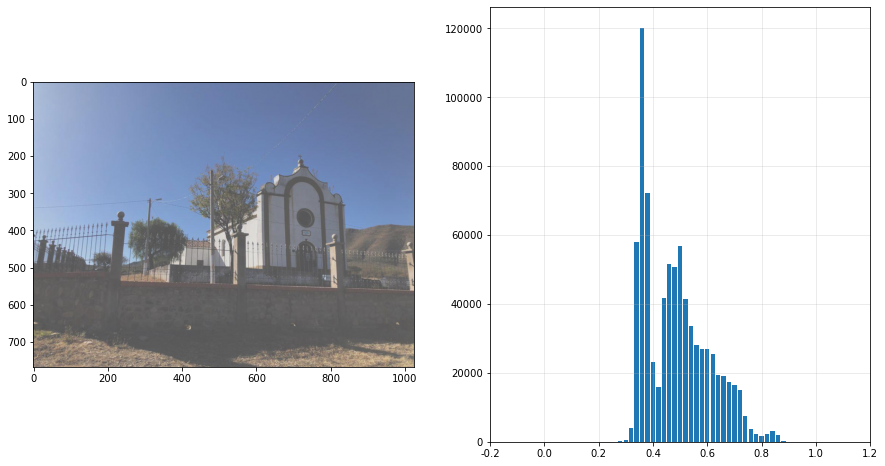

In [67]:
Imagen_RGB = imageio.imread('../PDITARRAGA/SellaIglesia.jpeg')/255
fig, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(Imagen_RGB, vmin=0, vmax=1)
plot_hist(Imagen_RGB, 50, axes[1])

# 1. Normalizar histograma al rango [0,1]

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.24719607843137253
0.9845921568627449
0.0
1.0


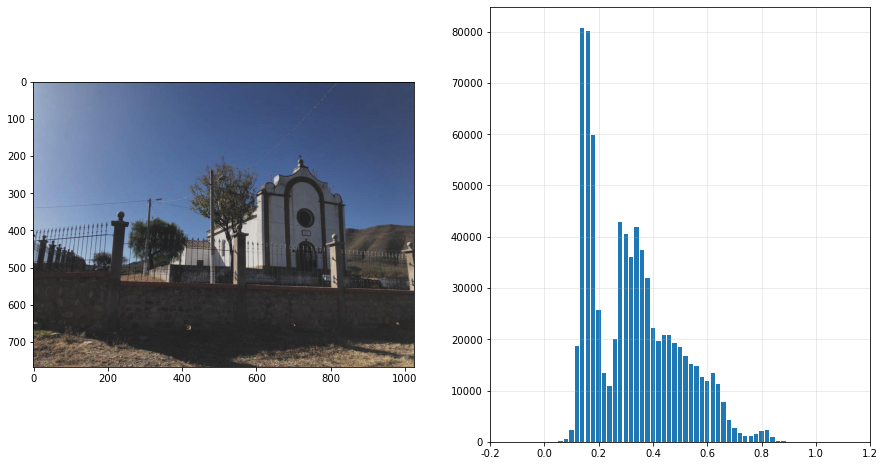

In [68]:
#Convertir al espacio YIQ
YIQ=rgb2yiq(Imagen_RGB)
Ymin=YIQ[:,:,0].min()
Ymax=YIQ[:,:,0].max()
print(Ymin)
print(Ymax)
#
YIQN = YIQ.copy()
YIQN[:,:,0]   =(YIQ[:,:,0]-Ymin)/(Ymax-Ymin) # Normalizacion de cero a 1
Ymin2=YIQN[:,:,0].min()
Ymax2=YIQN[:,:,0].max()
print(Ymin2)
print(Ymax2)
Imagen1 = yiq2rgb(YIQN) #Convierte de YIQ Normalizado a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(Imagen1, vmin=0, vmax=1)
plot_hist(Imagen1, 50, axes[1])

## 1.1 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1. Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.24719607843137253
0.9845921568627449
0.0
1.0


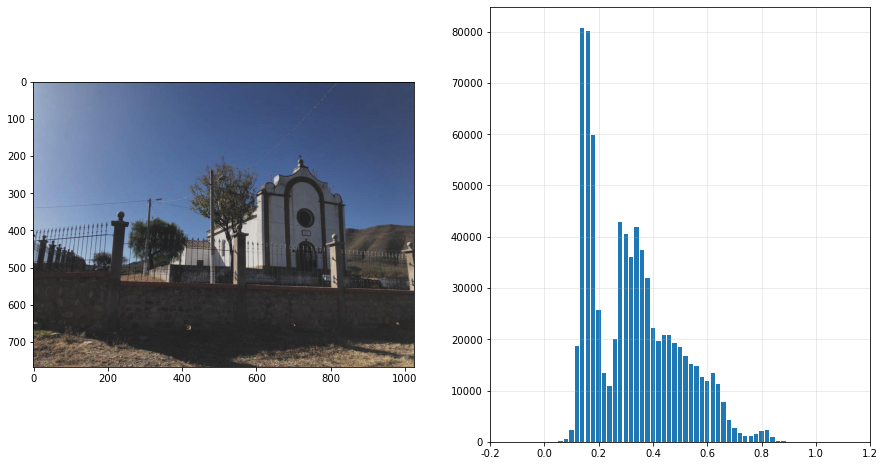

In [69]:
Np0=np.percentile(YIQ[:,:,0],0)
Np100=np.percentile(YIQ[:,:,0],100)
print(Np0)
print(Np100)
YIQNp = YIQ.copy()
YIQNp[:,:,0]   =(YIQ[:,:,0]-Np0)/(Np100-Np0) # Normalizacion de cero a 1
Imagen2 = yiq2rgb(YIQNp) #Convierte de YIQ Normalizado a RGB
Np02=np.percentile(YIQNp[:,:,0],0)
Np1002=np.percentile(YIQNp[:,:,0],100)
print(Np02)
print(Np1002)
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(Imagen2, vmin=0, vmax=1)
plot_hist(Imagen2, 50, axes[1])

## 2. Corrección gamma

1. Definir una función que aplique la corrección gamma a una imagen. Si la imagen es RGB, debe aplicar la corrección sobre la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] (con min y max o con percentiles) y luego aplicar corrección gamma.


Como sugerencia, pasarle como parámetro un valor $\alpha$ de manera que $\gamma$ se calcule como:

$\gamma = 2^{-\alpha}$

De esta manera, cuando $\alpha=1 \rightarrow \gamma=1/2$, y cuando $\alpha=-1 \rightarrow \gamma=2$. Entonces, para $\alpha>0$ la luminosidad aumenta y para $\alpha<0$ disminuye.

In [70]:
## Se procede a usar la matriz normalizada con valores maximos y minimos
Filas,Columnas,Canales=YIQN.shape # obtenemos el tamaño de la imagen original de YIQ
YIQGama = np.zeros((Filas,Columnas,3)) # Genera matriz vacia para Gama=1/2
YIQGama[:,:,1]=YIQN[:,:,1]
YIQGama[:,:,2]=YIQN[:,:,2]
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
              YIQGama[i,j,0] = pow(YIQN[i,j,0],1/2) ; #Calcula Y=Y`(2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen con Gama 1/2')

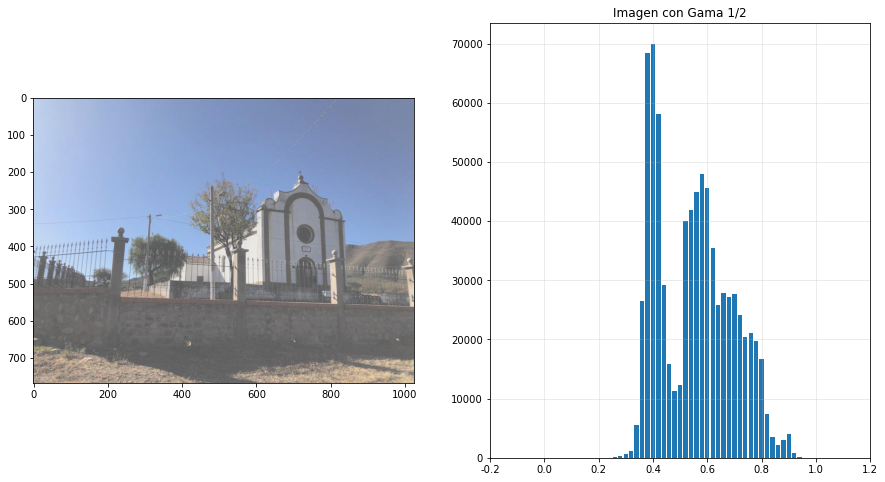

In [71]:
ImagenRGBGama = yiq2rgb(YIQGama) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBGama, vmin=0, vmax=1)
plot_hist(ImagenRGBGama, 50, axes[1])
axes[1].set_title('Imagen con Gama 1/2')

In [72]:
YIQGama2 = np.zeros((Filas,Columnas,3)) # Genera matriz vacia para Gama=2
YIQGama2[:,:,1]=YIQN[:,:,1]
YIQGama2[:,:,2]=YIQN[:,:,2]
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
              YIQGama2[i,j,0] = pow(YIQN[i,j,0],2) ; #Calcula Y=Y`(2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen con Gama 2')

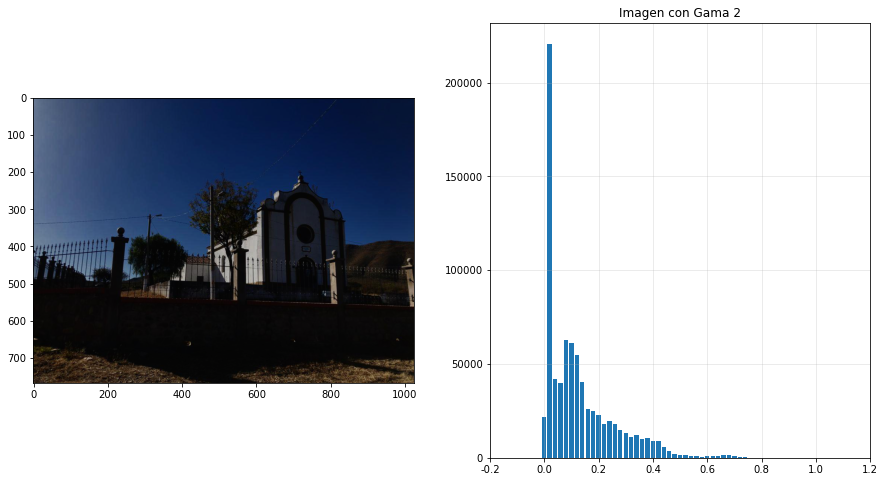

In [73]:
ImagenRGBGama2 = yiq2rgb(YIQGama2) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBGama2, vmin=0, vmax=1)
plot_hist(ImagenRGBGama2, 50, axes[1])
axes[1].set_title('Imagen con Gama 2')

# 3. Modificación del histograma por una función definida a tramos

1. Definir una función que tome una imagen y dos arreglos $x$ e $y$ que definan una función no-lineal en el rango $0\leq x,y\leq 1$ y aplique la función a la intensidad de los pixeles de la imagen. Si la imagen es RGB debe aplicar la función a la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] y luego aplicar corrección gamma.

Ayuda: La función np.interp() puede facilitarle la tarea

In [74]:
#Convertir al espacio YIQ
YIQ=rgb2yiq(Imagen_RGB)
Ymin=YIQ[:,:,0].min()
Ymax=YIQ[:,:,0].max()
print(Ymin)
print(Ymax)
#
YIQN = YIQ.copy()
YIQN[:,:,0]   =(YIQ[:,:,0]-Ymin)/(Ymax-Ymin) # Normalizacion de cero a 1
Ymin2=YIQN[:,:,0].min()
Ymax2=YIQN[:,:,0].max()
print(Ymin2)
print(Ymax2)
#Se va definir el tramo entre 0,2 y 0,8
Vmin = 0.10
Vmax = 0.70
#Se utiliza Imagen 1 normalizado por max y min
YIQLtrozos = np.zeros((Filas,Columnas,3)) # Genera matriz vacia para Gama=2                   
YIQLtrozos[:,:,1]=YIQN[:,:,1]
YIQLtrozos[:,:,2]=YIQN[:,:,2]
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
                if  YIQN[i,j,0] >= 0 and YIQN[i,j,0] <= Vmin :
                    YIQLtrozos[i,j,0] = 0  #Si es menor a Ymin_ entonces Y=
                elif YIQN[i,j,0] >= Vmax and YIQN[i,j,0] <= 1 :
                    YIQLtrozos[i,j,0] = 1
                else :
                    YIQLtrozos[i,j,0] = YIQN[i,j,0]

0.24719607843137253
0.9845921568627449
0.0
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen LINEAL A TROZOS')

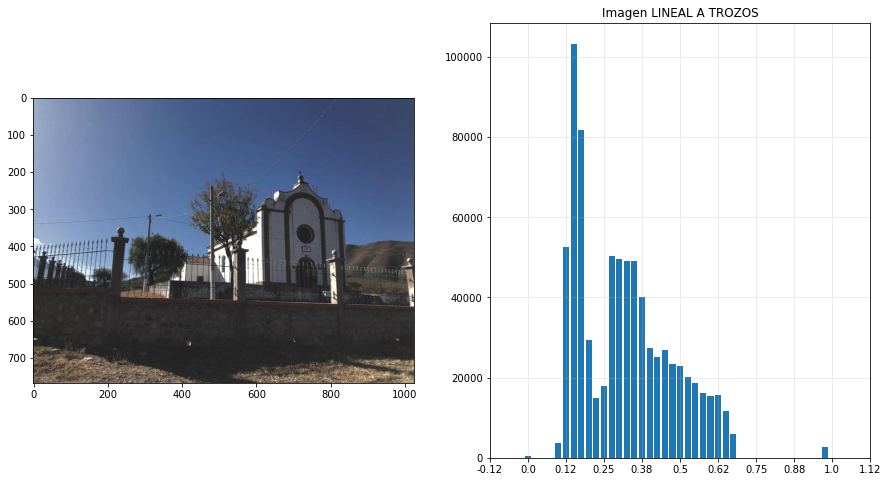

In [75]:
ImagenRGBLT = yiq2rgb(YIQLtrozos) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBLT, vmin=0, vmax=1)
plot_hist(ImagenRGBLT, 40, axes[1])
axes[1].set_title('Imagen LINEAL A TROZOS')

# 4. Uniformalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución uniforme. 
2. Normalizar el histograma al rango [0,1] y uniformalizar su distribución

0.24719607843137253
0.9845921568627449
0.11899475028055581
0.4959623609006795
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[5.66460681e-04 1.32124500e-02 1.52085006e-01 8.63930678e-01
 2.42192588e+00 3.35067462e+00 2.28766864e+00 7.70803072e-01
 1.28169063e-01 1.05174980e-02 4.25923028e-04]


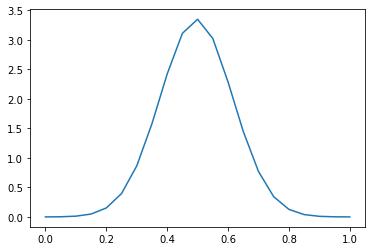

In [76]:
#Convertir al espacio YIQ
YIQ4=rgb2yiq(Imagen_RGB)
Y4min=YIQ4[:,:,0].min()
Y4max=YIQ4[:,:,0].max()
print(Y4min)
print(Y4max)
YIQN4 = YIQ4.copy()
from scipy.stats import norm
Desviacion = np.std(YIQN4[:,:,0]) #Desviacion estandar de Y
Media = np.mean(YIQN4[:,:,0]) #Calcula la media
print(Desviacion)
print(Media)
x4 = np.arange(0,1.05,0.05)
print(x)   
y4 = norm.pdf(x4,Media,Desviacion) #scipy.stats.norm.pdf(x, loc=0, scale=1)
#scale = Specify standard deviation of the distribution. Must be non-negative. Default is 1.0.
print(y)   
plt.plot(x4, y4) 
plt.show()

# 5. Normalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución normal. 
2. Normalizar el histograma al rango [0,1] y normalizar su distribución.